<h1>Содержание
    <span class="tocSkip">
    </span>
</h1>

<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка и подготовка данных-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение и проверка модели-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>
                    Обучение и проверка модели
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка к расчёту прибыли-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Подготовка к расчёту прибыли
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт прибыли и рисков-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Расчёт прибыли и рисков
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Чек-лист готовности проекта
                </a>
            </span>
        </li>
    </ul>
</div>




# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# План исследования:


1. Загрузите и подготовьте данные. Поясните порядок действий.

2. Обучите и проверьте модель для каждого региона:

2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

2.2. Обучите модель и сделайте предсказания на валидационной выборке.

2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

2.5. Проанализируйте результаты.

3. Подготовьтесь к расчёту прибыли:

3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.

3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой 
скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

3.3. Напишите выводы по этапу подготовки расчёта прибыли.

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

4.1. Выберите скважины с максимальными значениями предсказаний. 

4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим 
предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.

5. Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

## Описание данных

Данные геологоразведки трёх регионов находятся в файлах: 
/datasets/geo_data_0.csv. Скачать датасет
/datasets/geo_data_1.csv. Скачать датасет
/datasets/geo_data_2.csv. Скачать датасет

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

Условия задачи:

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import math
from tqdm.auto import tqdm

from sklearn.linear_model import LinearRegression

from scipy. stats import f_oneway
from statsmodels. stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Импортировали необходимые библиотеки

In [46]:
try: 
    geo_data_0 = pd.read_csv('geo_data_0.csv')
    geo_data_1 = pd.read_csv('geo_data_1.csv')
    geo_data_2 = pd.read_csv('geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Загрузили данные

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Все данные одинаковой структуры

In [6]:
geo_data_0_train, geo_data_0_test = train_test_split(geo_data_0, test_size=0.25, random_state=12345)
geo_data_1_train, geo_data_1_test = train_test_split(geo_data_1, test_size=0.25, random_state=12345)
geo_data_2_train, geo_data_2_test = train_test_split(geo_data_2, test_size=0.25, random_state=12345)

In [7]:
data = pd.concat([geo_data_0_train, geo_data_1_train, geo_data_2_train], ignore_index=True, sort=False)
data_test = pd.concat([geo_data_0_test, geo_data_1_test, geo_data_2_test], ignore_index=True, sort=False)

По заданию не очень понятно нужно смотреть все выборки вместе или раздельно. Поэтому посмотрим и так, и так. 
Представляется более правильным смотреть только тренировочные данные и не "подглядывать" в тестовую выборку

In [8]:
data.head()

,id,f0,f1,f2,product
0,sn8dh,0.022450,0.951034,2.197333,147.370612
1,oqj58,1.766731,0.007835,6.436602,147.630053
2,MaWjy,0.724514,0.666063,1.840177,77.696728
3,jyV1V,-1.104181,0.255268,2.026156,55.210501
4,g2kgI,-0.635263,0.747990,6.643327,113.891723


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       225000 non-null  object 
 1   f0       225000 non-null  float64
 2   f1       225000 non-null  float64
 3   f2       225000 non-null  float64
 4   product  225000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 8.6+ MB


In [10]:
len(data['id'].unique())

224971

Мы видим, что есть некоторое количество повторов. Попробуем их определить

In [11]:
counter = {}

for elem in data['id']:
    counter[elem] = counter.get(elem, 0) + 1

doubles = {element: count for element, count in counter.items() if count > 1}

print(doubles)

{'rAJA6': 2, 'g3RRG': 2, 'QcMuo': 2, 'fiKDv': 2, 'Tdehs': 2, 'bsk9y': 2, 'Mp3uM': 2, 'lFHA5': 2, 'G6k8A': 2, '74z30': 2, 'TXPOv': 2, 'i2csb': 2, 'LhkAh': 2, 'CXJ2r': 2, 'Suyut': 2, 'A5aEY': 2, 'gnA83': 2, 'PyNp5': 2, '2tyMi': 2, 'LHZR0': 2, 'wt4Uk': 2, 'TAqwC': 2, '5ltQ6': 2, 'D8TNs': 2, 'g2I86': 2, 'uMqiK': 2, 'Vcm5J': 2, 'KUPhW': 2, 'xCHr8': 2}


Повторы найдены

In [12]:
for i in doubles.keys():
    print(data[data['id'] == i])

           id        f0        f1        f2    product
1240    rAJA6  0.763807 -0.256567 -2.539103  36.295666
203373  rAJA6  1.426039  1.262731  1.915009  80.927100
          id        f0        f1        f2     product
9300   g3RRG  1.256835 -0.594468  2.258115   36.909351
87678  g3RRG  5.884971 -3.853958  5.000735  134.766305
          id        f0        f1        f2    product
11959  QcMuo  0.635635 -0.473422  0.862670  64.578675
14160  QcMuo  0.506563 -0.323775 -2.215583  75.496502
          id        f0        f1        f2     product
12068  fiKDv  0.157341  1.028359  5.585586   95.817889
42391  fiKDv  0.049883  0.841313  6.394613  137.346586
          id        f0        f1        f2    product
15073  Tdehs  0.112079  0.430296  3.218993  60.964018
47789  Tdehs  0.829407  0.298807 -0.049563  96.035308
          id        f0        f1         f2     product
17534  bsk9y  0.378429  0.005837   0.160827  160.637302
42759  bsk9y  0.398908 -0.400253  10.122376  163.433078
          id 

Видно, что значения в повторах разные. Можно предположить, что замеры сделаны в разное время или ошибки в названии скважин. Я думаю можно посмотреть оба варианта и построить модель на данных с замененными повторами и без. 

In [13]:
data_drop = data
for i in doubles.keys():
    mean = data[data['id'] == i]
    data_drop.loc[data['id'] == i,'f0'] = mean.loc[:,'f0'].mean()
    data_drop.loc[data['id'] == i,'f1'] = mean.loc[:,'f1'].mean()
    data_drop.loc[data['id'] == i,'f2'] = mean.loc[:,'f2'].mean()
    data_drop.loc[data['id'] == i,'product'] = mean.loc[:,'product'].mean()

data_drop = data_drop.drop_duplicates()
data_drop = data_drop.reset_index(drop=True)
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224971 entries, 0 to 224970
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       224971 non-null  object 
 1   f0       224971 non-null  float64
 2   f1       224971 non-null  float64
 3   f2       224971 non-null  float64
 4   product  224971 non-null  float64
dtypes: float64(4), object(1)
memory usage: 8.6+ MB


Сделали отдельную выборку и заменили в ней значения средними из двух повторов.

In [14]:
#фукция которая рисует гистограмму и боксплот для оценки выбросов и распрелделения 
def description_and_plot (data, column):
    stat = data[column].describe()
    print(f'Описательная статистика столбца "{column}":\n'
         f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
         f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
         f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.\n' 
         f'Нижняя граница выбросов: {round(stat[4] - 1.5 * (stat[6]-stat[4]),2)}.\n'
         f'Верхняя граница выбросов: {round(stat[6] + 1.5 *(stat[6]-stat[4]),2)}.' 
         )
    
    min_emissions = stat[4] - 1.5 * (stat[6]-stat[4])
    max_emissions = stat[6] + 1.5 *(stat[6]-stat[4])
    plt.figure(figsize=(16, 5))
    g = sns.histplot(data=data, x=data[column], kde=True)
    
    plt.show()
    plt.figure(figsize=(16, 1))
    sns.boxplot(x=data[column]).set(ylabel=' \n \n')
    return (min_emissions, max_emissions)

In [15]:
#функция которая удаляет выбросы
def delete_emissions (data, column, min_emissions, max_emissions):
    data = data[(data[column] > min_emissions) & (data[column] < max_emissions)]
    return(data)

Описательная статистика столбца "f0":
Среднее: 0.55±0.01
Медиана: 0.35, межквартильный размах: 2.76
Минимальное значение: -31.61. Максимальное значение: 29.42.
Нижняя граница выбросов: -5.14.
Верхняя граница выбросов: 5.89.


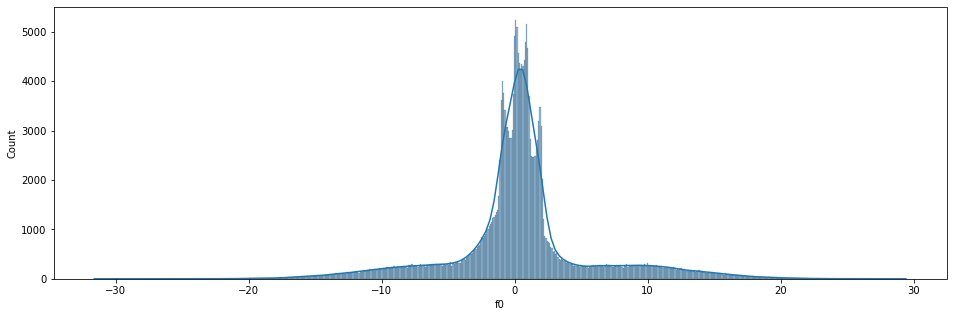

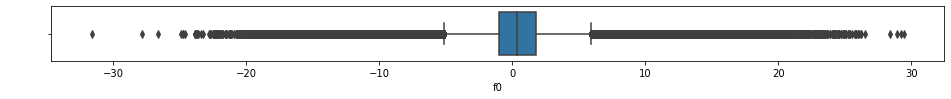

In [16]:
min_emissions, max_emissions = description_and_plot(data=data, column='f0')

data_not_emissions = delete_emissions(data, 'f0', min_emissions, max_emissions)

Описательная статистика столбца "f1":
Среднее: -1.52±0.01
Медиана: -0.23, межквартильный размах: 3.15
Минимальное значение: -26.36. Максимальное значение: 18.73.
Нижняя граница выбросов: -7.2.
Верхняя граница выбросов: 5.41.


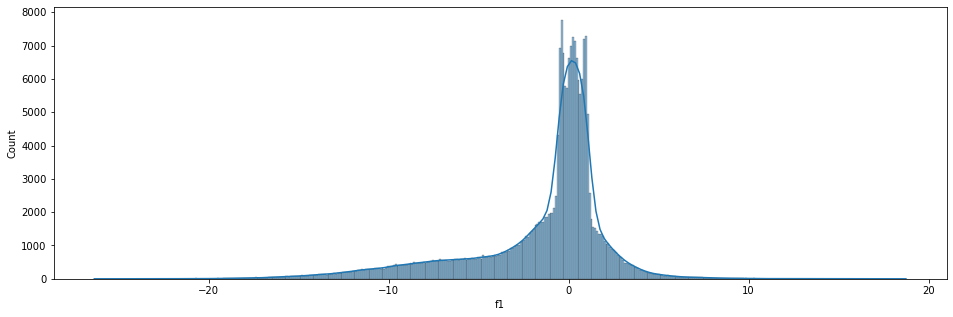

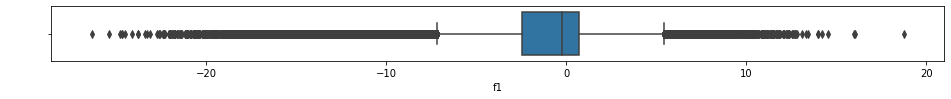

In [17]:
min_emissions, max_emissions = description_and_plot(data=data, column='f1')
data_not_emissions = delete_emissions(data_not_emissions, 'f1', min_emissions, max_emissions)

Описательная статистика столбца "f2":
Среднее: 2.5±0.01
Медиана: 2.49, межквартильный размах: 3.69
Минимальное значение: -11.97. Максимальное значение: 16.74.
Нижняя граница выбросов: -4.89.
Верхняя граница выбросов: 9.89.


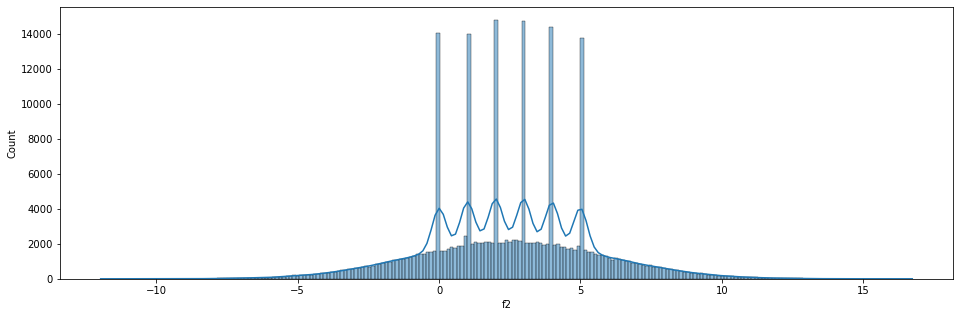

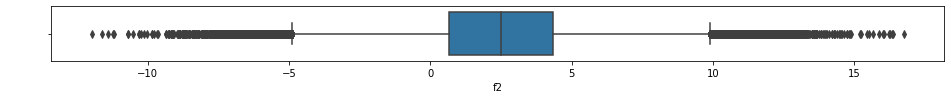

In [18]:
min_emissions, max_emissions = description_and_plot(data=data, column='f2')
data_not_emissions = delete_emissions(data_not_emissions, 'f2', min_emissions, max_emissions)

У всех трех факторов мы наблюдаем большое количество выбросов. Попробуем их убрать в отдельной выборке, но кажется это не принесет пользы для построения модели, так как удалится большое количество данных.

Описательная статистика столбца "product":
Среднее: 91.29±0.11
Медиана: 90.07, межквартильный размах: 72.06
Минимальное значение: 0.0. Максимальное значение: 190.03.
Нижняя граница выбросов: -52.05.
Верхняя граница выбросов: 236.2.


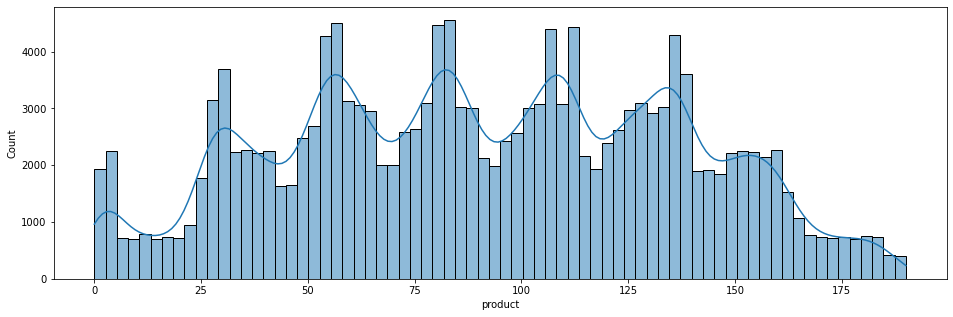

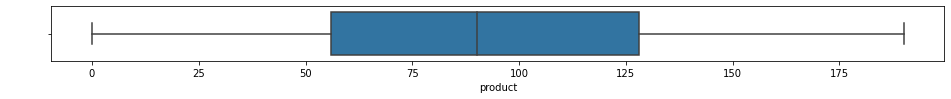

In [19]:
min_emissions, max_emissions = description_and_plot(data=data_not_emissions, column='product')

В распределении количества запасов нефти мы не наблюдаем большого количества выбросов, но зато заметны увеличение частот некоторых значений. 

In [20]:
def corr_mat(data):
    sns.set_theme(style="whitegrid")

    corr_mat = data.corr().stack().reset_index(name="correlation")

    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=4, sizes=(100, 450), size_norm=(-.2, .8),
    )

    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.1)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")
    return

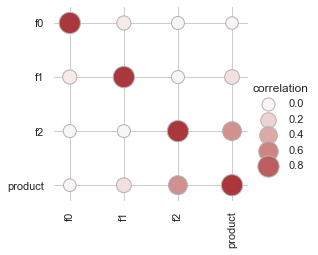

In [21]:
corr_mat(data)

Значимых корреляций между переменными в выборке не наблюдается 

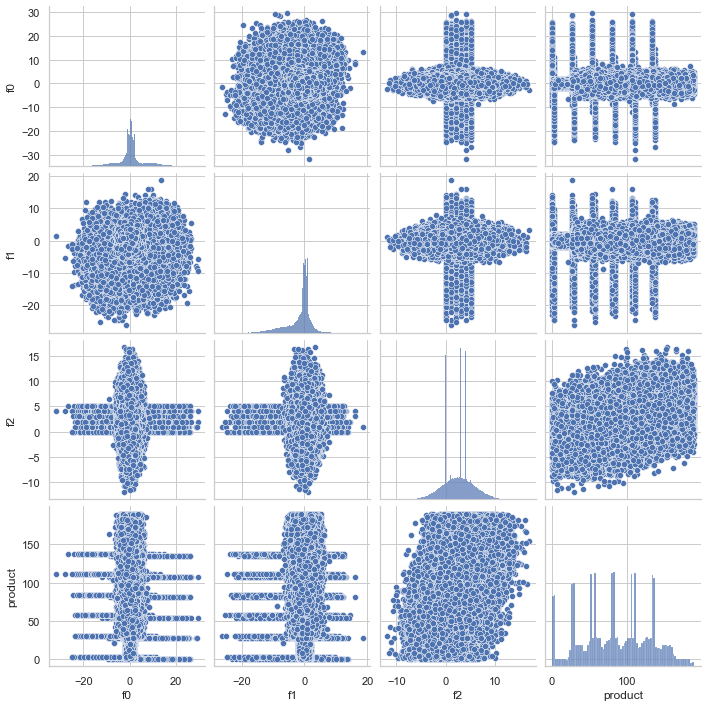

In [22]:
sns.pairplot(data);

При анализа распределений мы видим значительные аномалии в данных. Небольшая корреляция видна только у фактора 2, но она достаточна незначительная.

In [23]:
sns.set(style="darkgrid")
def four_histplot (data):
    fig, axs = plt.subplots(1, 4, figsize=(16, 3))
    sns.histplot(data=data, x="f0", kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=data, x="f1", kde=True, color="olive", ax=axs[1])
    sns.histplot(data=data, x="f2", kde=True, color="gold", ax=axs[2])
    sns.histplot(data=data, x="product", kde=True, color="teal", ax=axs[3])
    plt.show()
    return

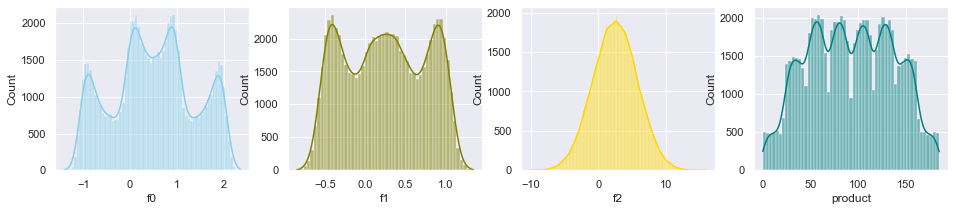

In [24]:
four_histplot(geo_data_0_train)

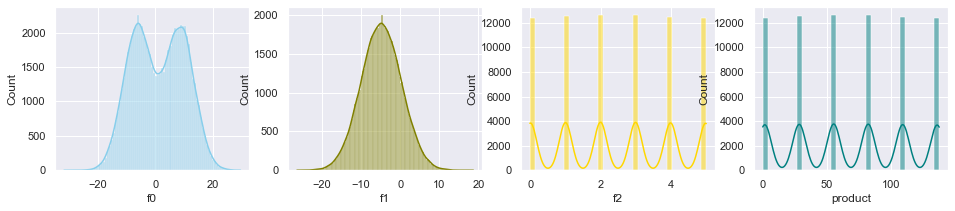

In [25]:
four_histplot(geo_data_1_train)

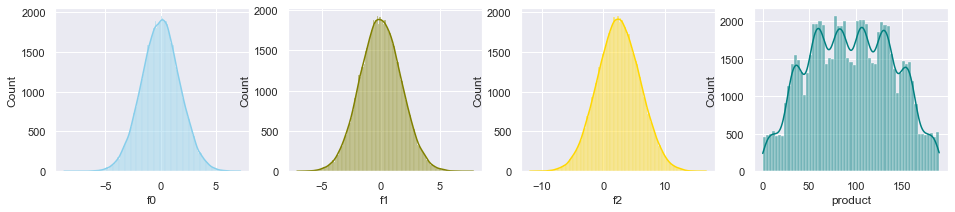

In [26]:
four_histplot(geo_data_2_train)

Совершенно другой вид преобретают данные при расмотрении отдельно по регионам. Очень интересно посмотреть как видут они себя на графике распределений

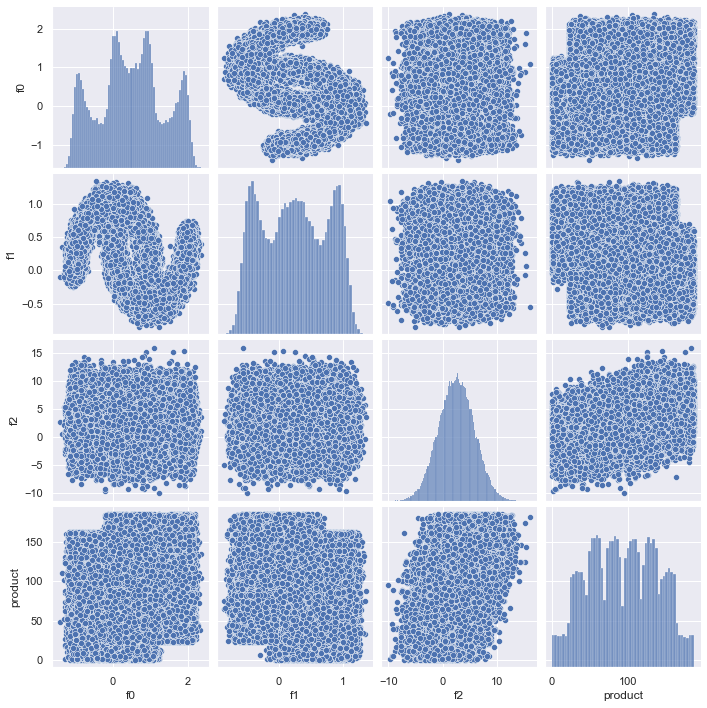

In [27]:
sns.pairplot(geo_data_0_train);

Очень любопытные "червячки" между ф0 и ф1 ))) в целом корреляций не видно.

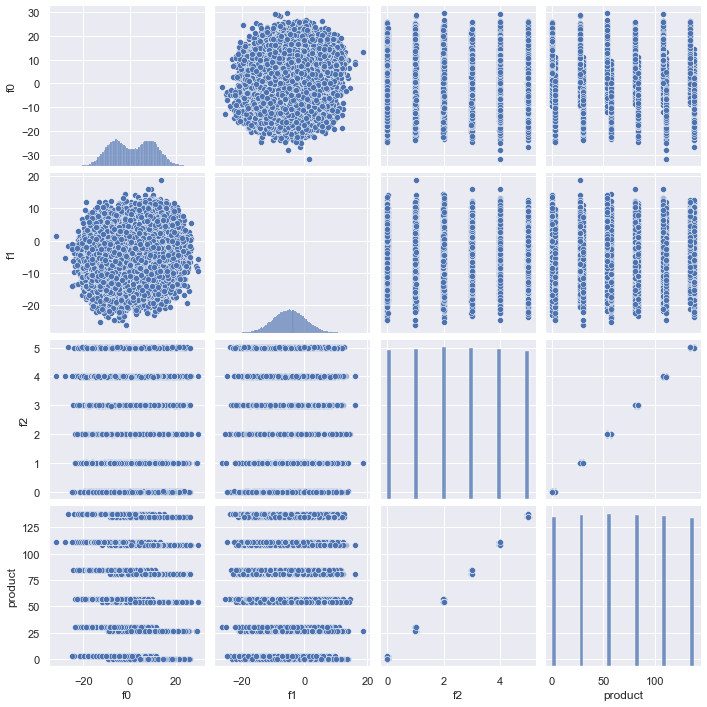

In [28]:
sns.pairplot(geo_data_1_train);

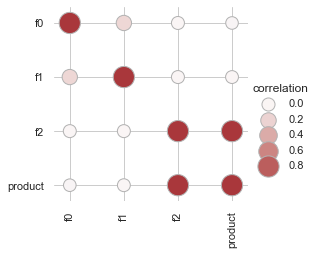

In [29]:
corr_mat(geo_data_1_train)

Регион под номером 1, тоже удивляет своими данными. Особенно абсолютной корреляцией запаса нефти в скважине и ф2

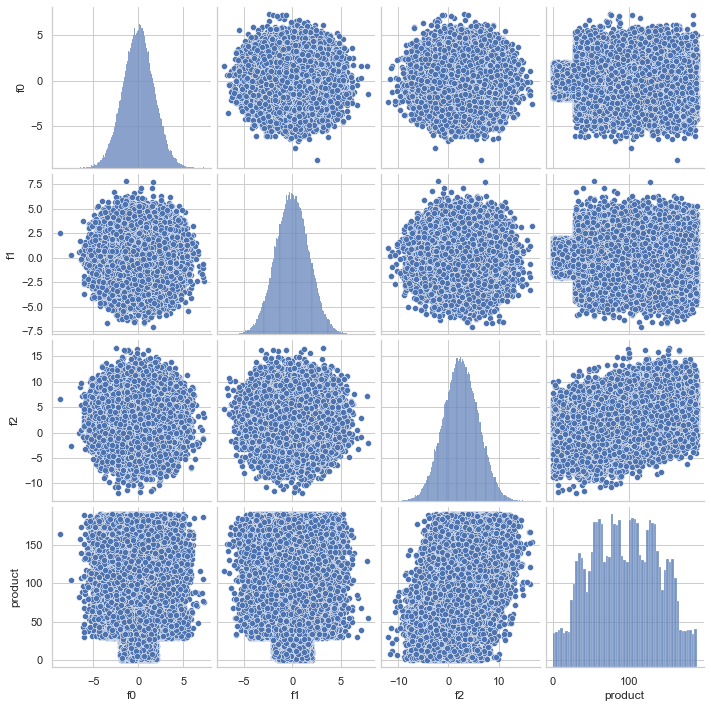

In [30]:
sns.pairplot(geo_data_2_train);

В регионе 2 данные не имеют видимых зависимостей между запасом нефти и факторами

## Обучение и проверка модели


In [31]:
#две функции которые маштабируеют числовые переменные
def preprocessing_train (X_train):
    X_train = X_train.reset_index(drop=True)
    numeric = X_train.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    scaler.fit(X_train[numeric])
    X_train[numeric] = scaler.transform(X_train[numeric])
    return (X_train, scaler)

def preprocessing_valid_or_test (X_valid, scaler):
    X_valid = X_valid.reset_index(drop=True)
    numeric = X_valid.select_dtypes(include=np.number).columns
    X_valid[numeric] = scaler.transform(X_valid[numeric])
    return (X_valid)

In [32]:
#Функия для моделирования принимает данные, выдает модель и выборки для дальнейших целей
def modeling(data, data_test):
    X_train = data.drop(['product'], axis=1)
    y_train = data['product']

    X_test = data_test.drop(['product'], axis=1)
    y_test = data_test['product']
    
    X_train, scaler = preprocessing_train(X_train)
    X_test = preprocessing_valid_or_test(X_test, scaler)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    X_train = X_train.drop(['id'], axis = 1)
    X_test = X_test.drop(['id'], axis = 1)

    model_linear = LinearRegression() 
    model_linear.fit(X_train, y_train) 
    y_pred = model_linear.predict(X_test)
    result = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f'RMSE = {result}, r2= {r2}')
    
    return(model_linear, X_test, X_train, y_test, y_train, y_pred)

In [33]:
model_linear_drop, X_test_drop, X_train_drop, y_test_drop, y_train_drop, y_pred_drop = modeling(data_drop, data_test)

RMSE = 38.71706766551312, r2= 0.30899784683784015


Модель с удаленными повторами. результат не удовлетворительный

In [34]:
model_linear_not_emissions, X_test_not_emissions, X_train_not_emissions, \
y_test_not_emissions, y_train_not_emissions, y_pred_not_emissions = modeling(data_not_emissions, data_test)

RMSE = 39.5649532125962, r2= 0.27840120613121944


Удаление выбросов показало себя еще хуже

In [35]:
model_linear_all, X_test_all, X_train_all, y_test_all, y_train_all, y_pred_all \
= modeling(data, data_test)

RMSE = 38.71707491472705, r2= 0.3089975880773912


Изначальные объединенные данные также показали себя на уровне выборки с удаленными повторами

## Обучите и проверьте модель для каждого региона:

In [36]:
model_linear_geo_0, X_test_geo_0, X_train_geo_0, y_test_geo_0, y_train_geo_0, y_pred_geo_0 = \
modeling(geo_data_0_train, geo_data_0_test)

RMSE = 37.5794217150813, r2= 0.27994321524487786


Моделирование в регионе 0 показало очень низкий результат

In [37]:
model_linear_geo_1, X_test_geo_1, X_train_geo_1, y_test_geo_1, y_train_geo_1, y_pred_geo_1 = \
modeling(geo_data_1_train, geo_data_1_test)

RMSE = 0.8930992867756167, r2= 0.9996233978805127


Моделирование в регионе 1 показало очень хорошую линейную зависимость. Что конечно опосредованно ф2 который имел высокую корреляцию с запасом нефти в скважине

In [38]:
model_linear_geo_2, X_test_geo_2, X_train_geo_2, y_test_geo_2, y_train_geo_2, y_pred_geo_2 = \
modeling(geo_data_2_train, geo_data_2_test)

RMSE = 40.02970873393434, r2= 0.20524758386040443


В регионе 2 было самое низкое качество модели

## Подготовка к расчёту прибыли

Это предложение трудно понять:
"Рассчитайте достаточный объём сырья для безубыточной разработки новой 
скважины. Сравните полученный объём сырья со средним запасом в каждом регионе."

То есть мы расчитываем объем для "новой", то есть 1 скважине.
А потом надо сравнить с запасом в регионе, не очень понятно, что считать запасом. Объем по всех скважинах. Нужно его сумировать и разделить на все скважины. непонятная формулировка. В общем посчитал, что нужно посмотреть долю скважин имеют объем меньше среднего объема безубыточной скважины. 

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [39]:
budget = 10 ** 10
number_wells = 500
number_wells_top = 200
prices_one_barrel = 450
prices_one_production = prices_one_barrel * 1000
probability_losses = 2.5
bootstrap_conf_level = 0.95

In [40]:
#Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины.
#Не очень понятная формулировка
#минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
#я это понял так: что среднее количество продукта в 1 скважине необхожимое чтобы окупились 10 млрд. потраченные на 200 скважин
minimum_quantity = budget / number_wells_top / prices_one_production
print(f'Минимальное среднее количество продукта в 1 скважине: {minimum_quantity} т. баррелей')

Минимальное среднее количество продукта в 1 скважине: 111.11111111111111 т. баррелей


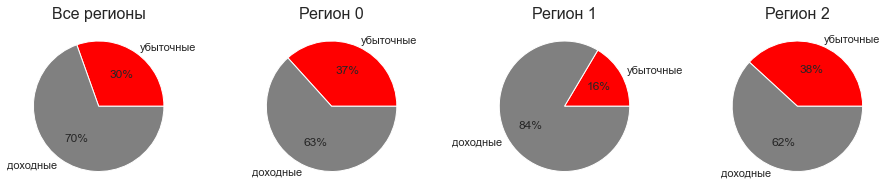

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3))
ax1.pie([y_train_all[y_train_all > minimum_quantity].count(), 
         y_train_all[y_train_all < minimum_quantity].count()],
        labels = ['убыточные', 'доходные'], 
        autopct='%.0f%%', colors=['red', 'grey'],
        )
ax2.pie([y_train_geo_0[y_train_geo_0 > minimum_quantity].count(), 
         y_train_geo_0[y_train_geo_0 < minimum_quantity].count()],
        labels = ['убыточные', 'доходные'], 
        autopct='%.0f%%', colors=['red', 'grey'],
        )
ax3.pie([y_train_geo_1[y_train_geo_1 > minimum_quantity].count(), 
         y_train_geo_1[y_train_geo_1 < minimum_quantity].count()],
        labels = ['убыточные', 'доходные'], 
        autopct='%.0f%%', colors=['red', 'grey'],
        )
ax4.pie([y_train_geo_2[y_train_geo_2 > minimum_quantity].count(), 
         y_train_geo_2[y_train_geo_2 < minimum_quantity].count()],
        labels = ['убыточные', 'доходные'], 
        autopct='%.0f%%', colors=['red', 'grey'],
        )
ax1.set_title('Все регионы', fontsize=16)
ax2.set_title('Регион 0', fontsize=16)
ax3.set_title('Регион 1', fontsize=16)
ax4.set_title('Регион 2', fontsize=16)
plt.show()


Во всей выборке было 30% убыточных скважин, в регионе 0 их доля составила 37%, регион 1 показал наименьшее количество убыточных скважин, на их долю пришлось меньше всего - 16%, а регион 2 показал самую большую долю убыточных скважин - 38%

## Расчёт прибыли и рисков 

3. Обучите и проверьте модель для каждого региона
4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
5. Посчитайте риски и прибыль для каждого региона

Тут имелось в веду, что нужна отдельная модель для каждого региона и каждый регион нужно проверять со своей моделью. Или нужна общая модель для трех регионов и нужно предсказывать доход в кажом регионе.
В общем сделал оба варианта. 

In [42]:
#Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
def revenue_calculation(X_subsample, y_subsample, у_subsample_pred, model_linear):
    #обнулим индексы так как могли по два раза взятся скважины
    revenue = []
    X_subsample = X_subsample.reset_index(drop = True)
    y_subsample = y_subsample.reset_index(drop = True)
    #у_subsample_pred = у_subsample_pred.reset_index(drop = True)
    
    #сортируем по возрастанию предсказания
    y_pred_sorted = у_subsample_pred.sort_values(0,ascending=False)
    #отбираем первые 200 из тестовой выборке по индесам из предсказанных
    selected = y_subsample[y_pred_sorted.index][:number_wells_top]
    #считаем выручку
    return (selected.sum() * prices_one_production)

Регион 0 средний доход составил: 10202785155.548864

95% Cl
0.025    9.705208e+09
0.975    1.070764e+10
dtype: float64

Риск убытка составляет: 0.227


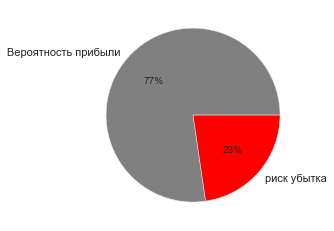

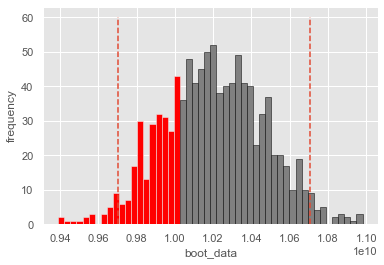

Регион 1 средний доход составил: 9610893863.494524

95% Cl
0.025    9.188327e+09
0.975    1.005891e+10
dtype: float64

Риск убытка составляет: 0.957


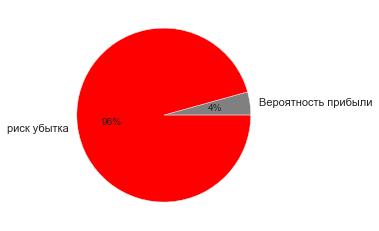

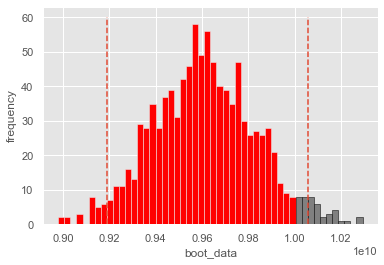

Регион 2 средний доход составил: 10373619445.917484

95% Cl
0.025    9.881163e+09
0.975    1.088002e+10
dtype: float64

Риск убытка составляет: 0.071


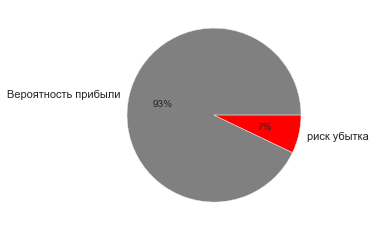

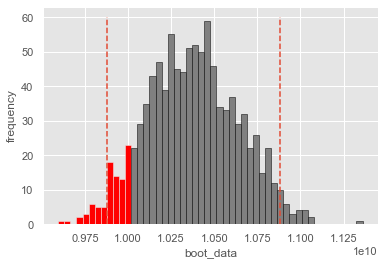

In [43]:
state = np.random.RandomState(12345)
#чтобы не запутаться по шагам коменты 
print('=====================================================================')

plt.style.use('ggplot')
geo_data = [geo_data_0_test, geo_data_1_test, geo_data_2_test]
revenues = []
model_linear = model_linear_all
for geo in range(3):
    revenue = []
    geo_data[geo] = geo_data[geo].drop(['id'], axis = 1)
    X_test = geo_data[geo].drop(['product'], axis=1)
    y_test = geo_data[geo]['product']
    for i in range(1000):
        #отбираем 500 скважин из еустовой выборки
        y_subsample = y_test.sample(n=number_wells, replace=True, random_state=state)
        #по идексам отбираем предикторы
        X_subsample = X_test.loc[y_subsample.index,:]
        #костыль для предсказаний по общей модели в итоговой версии его не будет
        y_pred = model_linear.predict(X_subsample)
        y_pred = pd.DataFrame(y_pred)
        #запускаем функцию передаем отобранные выборки и модель которую проверяем
        revenue.append(revenue_calculation(X_subsample, y_subsample, y_pred, model_linear))
    revenue = pd.Series(revenue)
    revenues.append(revenue)
    print(f'Регион {geo} средний доход составил: {revenue.mean()}')
    print()
    
    #вычислим доверительные интервалы
    
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = revenue.quantile([left_quant, right_quant])
    print('95% Cl')
    print(quants)
    print()    
    
    print(f'Риск убытка составляет: {revenue[revenue < budget].count() / revenue.count()}')
    plt.pie([revenue[revenue >= budget].count(), revenue[revenue < budget].count()],
            labels = ['Вероятность прибыли', 'риск убытка'], 
            autopct='%.0f%%', 
            colors=['grey', 'red'],
            );    
    plt.show()
    
    # Визуализация
    _, _, bars = plt.hist(revenue, bins = 50)

    for bar in bars:
        if abs(bar.get_x()) <= budget:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')


    plt.vlines(quants,ymin=0,ymax=60, linestyle='--')
    
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.show()
    print('=====================================================================')
    



Мы видим, что общая модель показала себя неудовлетворительно. По всей видимости к каждому региону нужно применять свою.

In [44]:
X_test

,f0,f1,f2
71751,-1.444717,-3.861599,2.225805
80493,-1.418617,1.276544,-0.976433
2655,-4.587649,-0.413199,1.649268
53233,1.871584,1.619101,4.273555
91141,-2.028785,4.128167,6.089547
...,...,...,...
12581,-1.315037,-0.122572,-0.345986
18456,0.015144,0.876998,2.603666
73035,0.725767,-0.151545,3.258620
63834,-0.232209,-0.180354,-0.524997


Регион 0 средний доход составил: 10396164984.802353

95% Cl
0.025    9.888784e+09
0.975    1.090977e+10
dtype: float64

Риск убытка составляет: 0.069


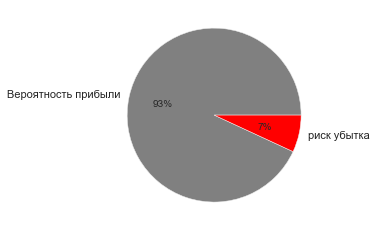

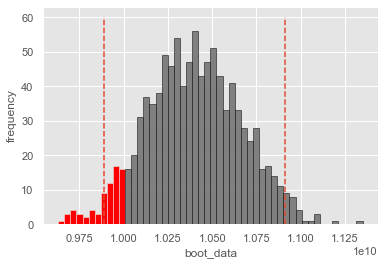

Регион 1 средний доход составил: 10461155817.277225

95% Cl
0.025    1.007805e+10
0.975    1.086295e+10
dtype: float64

Риск убытка составляет: 0.007


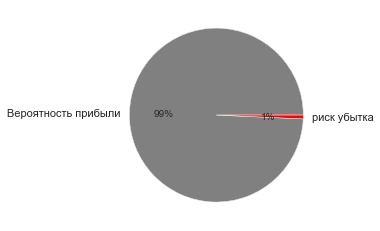

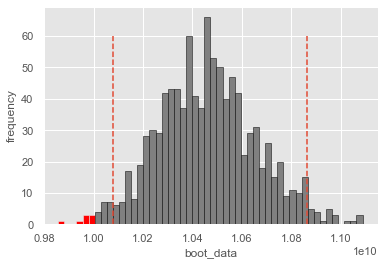

Регион 2 средний доход составил: 10392950475.170609

95% Cl
0.025    9.887772e+09
0.975    1.093456e+10
dtype: float64

Риск убытка составляет: 0.065


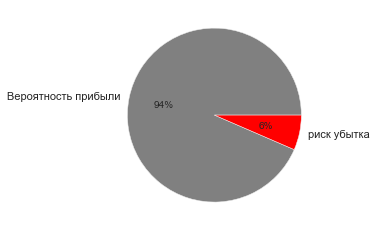

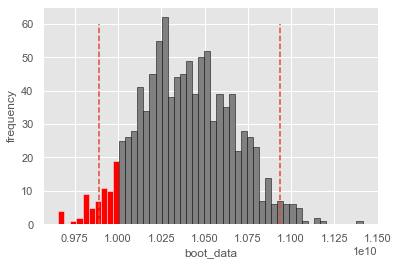

In [45]:
state = np.random.RandomState(12345)
#чтобы не запутаться по шагам коменты 
print('=====================================================================')
plt.style.use('ggplot')
geo_data = [geo_data_0_test, geo_data_1_test, geo_data_2_test]
y_pred = [y_pred_geo_0, y_pred_geo_1, y_pred_geo_2]
revenues = []
model_linear = [model_linear_geo_0, model_linear_geo_1, model_linear_geo_2]
for geo in range(3):
    revenue = []
    geo_data[geo] = geo_data[geo].drop(['id'], axis = 1)
    X_test = geo_data[geo].drop(['product'], axis=1)
    y_test = geo_data[geo]['product']
    X_test = X_test.reset_index(drop = True)
    y_test = y_test.reset_index(drop = True)
 
    for i in range(1000):
        #отбираем 500 скважин из еустовой выборки
        y_subsample = y_test.sample(n=number_wells, replace=True, random_state=state)
        #по идексам отбираем предикторы
        X_subsample = X_test.loc[y_subsample.index,:]
        у_subsample_pred = y_pred[geo][y_subsample.index]
        у_subsample_pred = pd.DataFrame(у_subsample_pred)
        #запускаем функцию передаем отобранные выборки и модель которую проверяем
        revenue.append(revenue_calculation(X_subsample, y_subsample, у_subsample_pred, model_linear[geo]))
    revenue = pd.Series(revenue)
    revenues.append(revenue)
    print(f'Регион {geo} средний доход составил: {revenue.mean()}')
    print()
    
    #вычислим доверительные интервалы
    
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = revenue.quantile([left_quant, right_quant])
    print('95% Cl')
    print(quants)
    print()    
    
    print(f'Риск убытка составляет: {revenue[revenue < budget].count() / revenue.count()}')
    plt.pie([revenue[revenue >= budget].count(), revenue[revenue < budget].count()],
            labels = ['Вероятность прибыли', 'риск убытка'], 
            autopct='%.0f%%', 
            colors=['grey', 'red'],
            );    
    plt.show()
    
    # Визуализация
    _, _, bars = plt.hist(revenue, bins = 50)

    for bar in bars:
        if abs(bar.get_x()) <= budget:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')


    plt.vlines(quants,ymin=0,ymax=60, linestyle='--')
    
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.show()
    print('=====================================================================')
    



Как показал анализ применение своей модели для каждого региона показала лучший результат. В регионе 0 и 2 риск убытков составил 12% и 7%, соответственно. И их 95% доверительный интервал пересекал доход в 10 млрд. рублей, что говорит о том, что риск получить убыток выше 2,5%

Регион 1 показал риск убытка в 0,7%, что является самым низким риском среди изученных регионов.  95% доверительный интервал не включал  10 млрд. рублей, что говорит о том, что риск получить убыток ниже 2,5%.

# Выводы

На основе предоставленых данных о пробах нефти в трёх регионах построена модель машинного обучения, которая помогает определять регион, где добыча принесёт наибольшую прибыль. Модели проанализированы техникой Bootstrap.

Выборки были разделены на тренировочные и тестовые. У всех трех факторов мы наблюдаем большое количество выбросов. 
В распределении количества запасов нефти мы не наблюдаем большого количества выбросов, но зато заметны увеличение частот некоторых значений. При анализа распределений мы видим значительные аномалии в данных. В регионе под номером 1, наблюдалась сильная обратная корреляция запаса нефти в скважине и фактором 2.

Модели с удаленными повторами и выбросами показали себя плохо, как и модель на основе объединенных данных.
По видимому параметры скважин индивидуальны для каждого региона и надо было придерживаться стратегии, что для каждого региона нужна своя модель. Сейчас мне это кажется очень логичным )))

Моделирование в регионе 0 показало очень низкий результат. Моделирование в регионе 1 показало очень хорошую линейную зависимость. В регионе 2 было самое низкое качество модели. В принципе оценивая r2 можно сказать, что в работу стоит брать только модель региона 1, но поскольку надо их сравнить будем сравнивать. 

Рассчитали достаточный объём сырья для безубыточной разработки новой  скважины. Минимальное среднее количество продукта в 1 скважине: 111.111 т. баррелей. Во всей выборке было 30% убыточных скважин, в регионе 0 их доля составила 37%, регион 1 показал наименьшее количество убыточных скважин, на их долю пришлось меньше всего - 16%, а регион 2 показал самую большую долю убыточных скважин - 38%

Общая модель показала себя неудовлетворительно. 

При применении для каждого региона отдельной модели было показано, что в регионе 0 и 2 риск убытков составил 12% и 7%, соответственно. И их 95% доверительный интервал пересекал доход в 10 млрд. рублей, что говорит о том, что риск получить убыток выше 2,5%
Регион 1 показал риск убытка в 0,7%, что является самым низким риском среди изученных регионов.  95% доверительный интервал не включал 10 млрд. рублей, что говорит о том, что риск получить убыток ниже 2,5%.

Для разработке стоит выбирать 1 регион и применять в нем предсказание модели. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован